# Hands On: __``Python for Data Visualization``__

Created by: [Mohammad Nurrokim](https://www.linkedin.com/in/mnurrokim/)


Modified by: `Muhammad Aulia Alwan`

[Referensi bacaan terkait Matplotlib architecture](https://www.aosabook.org/en/matplotlib.html)
<hr>

Data Visualization adalah bidang interdisipliner yang berhubungan dengan representasi data secara grafis. Ini adalah cara komunikasi yang sangat efisien ketika datanya banyak seperti misalnya Time Series. Data Visualization berakar pada bidang Statistik dan oleh karena itu umumnya dianggap sebagai cabang Statistik Deskriptif. Namun, karena keterampilan desain dan keterampilan statistik dan komputasi diperlukan untuk memvisualisasikan secara efektif, beberapa penulis berpendapat bahwa ini adalah Seni dan Sains. [[1]](https://en.wikipedia.org/wiki/Data_visualization)

### **1. Import Libraries**

Pada sesi ini, kita menggunakan library Pandas ini akan kita gunakan untuk membuka dataset. Library Pandas kita ganti nama menjadi pd untuk mempermudah untuk memanggil library ini. Untuk Data Visualization, kita menggunakan library Seaborn dan Matplotlib. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **2. Intro to Dataset: ``Amazon Best Selling Books``**

Dataset ``Amazon Best Selling Books`` adalah data publik dan legal. Anda dapat membaca deskripsi dan mengunduhnya di website [Kaggle](https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019). Dataset ini berisi tentang 50 buku penjualan terbaik di Amazon dari tahun 2009 sampai tahun 2019. Data telah dikategorikan ke dalam buku fiksi dan non-fiksi menggunakan Goodreads.
<br>
<br>
Data telah diunduh dan disimpan di Google Drive. Jalankan code di bawah ini untuk mengakses dataset di Google Drive.

Mari kita buka dataset menggunakan pandas (_pd.read_csv_), lalu simpan dataset ke dalam variabel dengan nama df. Data dapat kita lihat sekilas (5 baris awal) terlebih dahulu dengan _df.head()_

In [ ]:
df = pd.read_csv('bestsellers with categories.csv')
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


**Data Info**

Gambaran awal mengenai dataset dapat kita lihat menggunakan (_df.info()_). Melalui cara ini kita dapat melihat kolom apa saja di dataset, jumlah baris data yang terisi (tidak kosong), dan tipe datanya.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


<hr>

### **3. Data Visualization**

#### **A. Histogram**

Histogram adalah representasi grafis yang akurat dari distribusi data numerik. Histogram adalah perkiraan distribusi probabilitas dari variabel kuantitatif. Histogram memang mirip dengan grafik batang atau barplot. Tetapi, barplot atau grafik batang lebih tepat digunakan untuk membandingkan data numerik berdasarkan data kategorikal tertentu.

Berikut ini contoh ``Histogram`` untuk mendeskripsikan ``distribusi harga buku``. Terlihat distribusi harga buku banyak mengumpul di kisaran harga 0 sampai 20. Tidak terlalu banyak buku dengan harga di atas 20.

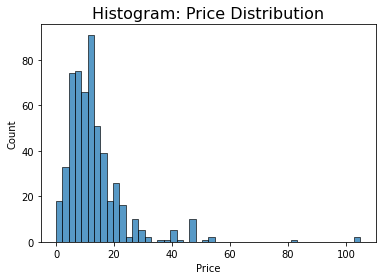

In [ ]:
sns.histplot(data = df['Price'])
plt.title('Histogram: Price Distribution', size=16)
plt.show()

**Mengubah skala axis x menjadi sesuai dengan range tiap bin**

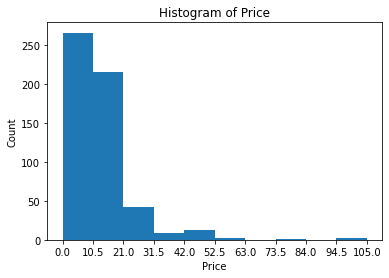

In [ ]:
count, bin_edges = np.histogram(df['Price'])

df['Price'].plot(kind='hist', xticks=bin_edges)

plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Count');

<hr>

#### **B. Boxplot**
Boxplot adalah jenis bagan yang sering digunakan dalam analisis eksplorasi data untuk memvisualisasi distribusi data numerik dan Skewness dengan menampilkan kuartil (atau persentil) data dan rata-rata.
Boxplot menunjukkan ringkasan lima hal dalam suatu data yaitu: skor minimum, kuartil pertama (bawah), median, kuartil ketiga (atas), dan skor maksimum.

[<center><img src="https://miro.medium.com/max/1050/1*2c21SkzJMf3frPXPAR_gZA.png" width="500" height="350"></center>](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51) 

Berikut ini contoh ``Boxplot`` untuk mendeskripsikan ``distribusi jumlah review buku``. Pada boxplot di bawah ini, terlihat batas bawah di sekitar angka 0. Jika kita deskripsi menggunakan _Pandas.describe()_ terlihat nilai terkecil adalah 37. Nilai tengahnya (median/50%/Q2) berada di angka 8580. Sedangkan batas atasnya di kisaran angka 40.000. Di atas batas atas ini, dianggap sebagai nilai outlier.

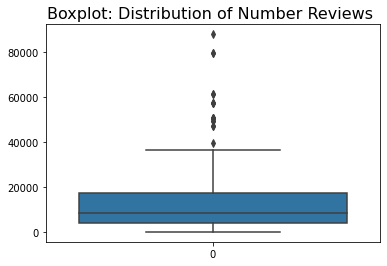

In [ ]:
sns.boxplot(data = df['Reviews'])
plt.title('Boxplot: Distribution of Number Reviews ', size=16)
plt.show()

Mari kita lihat deskripsi data ``Reviews``:

In [ ]:
df['Reviews'].describe()

count      550.000000
mean     11953.281818
std      11731.132017
min         37.000000
25%       4058.000000
50%       8580.000000
75%      17253.250000
max      87841.000000
Name: Reviews, dtype: float64

Berikut ini contoh membuat ``boxplot`` untuk membandingkan harga (``Price``) antara buku fiksi dan non fiksi:

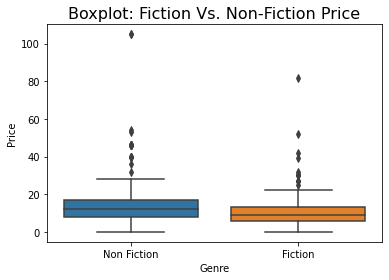

In [ ]:
sns.boxplot(x = df['Genre'], y = df['Price'])
plt.title('Boxplot: Fiction Vs. Non-Fiction Price', size=16)
plt.show()

<hr>

#### **C. Line Plot**

Line plot atau grafik garis adalah jenis bagan yang menampilkan informasi sebagai rangkaian titik data yang disebut 'penanda' yang dihubungkan oleh garis lurus. Grafik garis sering digunakan untuk memvisualisasikan tren dalam data selama interval waktu atau deret waktu, sehingga garis tersebut sering digambar secara kronologis. Melalui grafik ini, kita dapat melihat bagaimana satu atau beberapa variabel berkembang dari waktu ke waktu.

Berikut ini contoh ``Lineplot`` untuk melihat ``perkembangan rata-rata harga buku`` dari tahun ke tahun. Terlihat harga buku cukup tinggi sebelum tahun 2010. Lalu sempat turun drastis di sekitar tahun 2015. Sempat naik lagi di tahun 2016 lalu selanjutnya rata-rata harga buku terus mengalami penurunan.

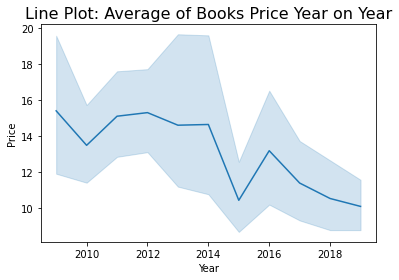

In [ ]:
sns.lineplot(x = df['Year'], y = df['Price'])
plt.title('Line Plot: Average of Books Price Year on Year', size=16)
plt.show()

Kita tambahkan ``hue`` berdasarkan **Genre**. Maka kita dapat kita lihat perkembangan rata-rata harga buku berdasarkan genre buku dari tahun ke tahun. Dapat kita lihat, rata-rata harga buku non-fiksi selalu di atas harga buku fiksi. Apalagi di tahun 2014, di saat harga buku non-fiksi mengalami kenaikan harga cukup drastis, justru buku fiksi mengalami penurunan harga.

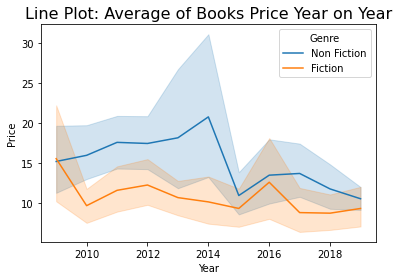

In [ ]:
sns.lineplot(x = df['Year'], y = df['Price'], hue=df['Genre'])
plt.title('Line Plot: Average of Books Price Year on Year', size=16)
plt.show()

**Subplots**

Often times we might want to plot multiple plots within the same figure.

To visualize multiple plots together, we can create a **`figure`** and divide it into **`subplots`**, each containing a plot. With **subplots**, we usually work with the **artist layer** instead of the **scripting layer**. 

Typical syntax is : <br>

```python
    fig = plt.figure() # create figure
    ax = fig.add_subplot(nrows, ncols, plot_number) # code to create subplots
```

Where

-   `nrows` and `ncols` are used to notionally split the figure into (`nrows` * `ncols`) sub-axes,  
-   `plot_number` is used to identify the particular subplot that this function is to create within the notional grid. `plot_number` starts at 1, increments across rows first and has a maximum of `nrows` * `ncols`.

**Example:**

fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)<br>
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot)<br>

`Subplot 1: Box plot`<br>
df.plot(kind='box', color='blue', vert=False, figsize=(10, 6), ax=ax0) # add to subplot 1<br>
ax0.set_title('Example of subplots 1')<br>
ax0.set_xlabel('x')<br>
ax0.set_ylabel('y')<br>

`Subplot 2: Line plot`<br>
df.plot(kind='line', figsize=(10, 6), ax=ax1) # add to subplot 2<br>
ax1.set_title ('Example of subplots 2')<br>
ax1.set_ylabel('x')<br>
ax1.set_xlabel('y')<br>

plt.show()

<hr>

#### **D. Scatterplot**

Scatter plot terdiri dari beberapa titik data yang diplot di dua sumbu. Setiap variabel yang digambarkan dalam scatter plot akan memiliki beberapa pengamatan. Scatter plot membantu dalam memvisualisasikan 2 variabel numerik. Plot ini juga membantu dalam mengidentifikasi pola korelasi atau tren antar variabel.

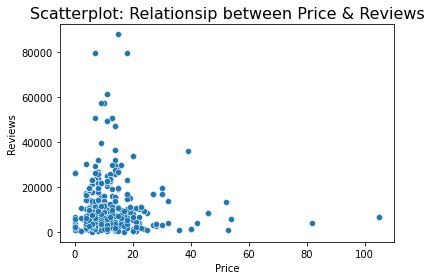

In [ ]:
sns.scatterplot(x = df['Price'], y = df['Reviews'])
plt.title('Scatterplot: Relationsip between Price & Reviews', size=16)
plt.show()

<hr>

#### **E. Bar Plot**

Bar plot atau bagan batang adalah bagan yang menyajikan data kategorik dengan batang persegi panjang dengan tinggi atau panjang yang sebanding dengan nilai yang diwakilinya.
Barplot memberikan informasi perbandingan antar data kategorikal. 
Pada barplot vertikal, sumbu X menunjukkan data kategori yang dibandingkan, dan sumbu Y mewakili nilai yang diukur. Untuk barplot horizontal berlaku sebaliknya.

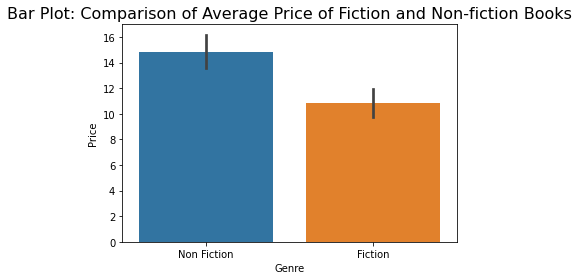

In [ ]:
sns.barplot(x = df['Genre'], y = df['Price'])
plt.title('Bar Plot: Comparison of Average Price of Fiction and Non-fiction Books', size = 16)
plt.show()

Error bars dapat memberikan beberapa informasi berikut terkait data yang sedang dikerjakan:

- Seberapa menyebar data dari nilai mean (seperti konsep standar deviasi). 
    - Semakin pendek error bar, berarti semakin sedikit juga variasi datanya. Dengan kata lain data berkumpul di sekitar nilai mean.
    - Semakin panjang error bar, berarti nilai data semakin variatif dari nilai mean.

- Seberapa reliable atau akuratnya nilai mean sebagai representatif dari data. 
    - Semakin pendek error bar, berarti semakin reliable.
    - Semakin panjang error bar, berarti kurang reliable.

    `Penting untuk diingat bahwa jika datanya memiliki error bar yang panjang, bukan berarti datanya tidak valid. Bisa saja karena memang variasi datanya tinggi.`

- Probabilitas terdapatnya perbedaan signifikan antara kategori. Perbedaan signifikan secara statistics berarti perbedaan pada hasil/data yang kita lihat bukan terjadi karena kebetulan atau sampling error, tapi karena hasil datanya memang berbeda. 

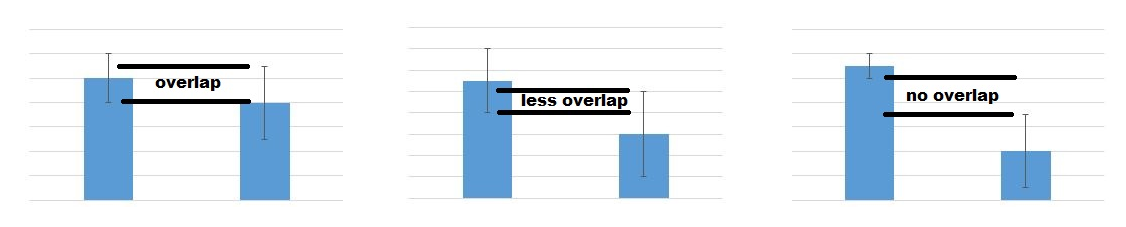

- Overlap: Jika standard deviation errors bars agak overlap, dapat dikatakan bahwa perbedaan antara 2 kategori tidaklah berbeda signifikan secara statistik. Untuk dapat memvalidasi dan mengambil kesimpulan yang tepat, lakukan uji statistikal. 

- Less overlap: Jika standard deviation errors bars overlap sangat tipis, dapat dikatakan bahwa perbedaan antara 2 kategori kemungkinan besar tidaklah berbeda signifikan secara statistik. Untuk dapat memvalidasi dan mengambil kesimpulan yang tepat, lakukan uji statistikal. 

- No overlap: Jika standard deviation error bars tidak overlap sama sekali, dapat dikatakan bahwa perbedaan antara 2 kategori kemungkinan signifikan. Akan tetapi, kita tidak bisa langsung yakin begitu saja untuk mengambil kesimpulan karena bisa saja terdapat bias subyektifitas. Tetap harus melakukan uji statistikal untuk dapat memvalidasi dan mengambil kesimpulan.

<hr>

#### **F. Pie Chart**

Diagram lingkaran atau Pie Chart dibagi menjadi beberapa irisan untuk menggambarkan proporsi numerik. Potongan diagram menunjukkan proporsi bagian-bagian dari keseluruhan informasi. Diagram lingkaran paling cocok untuk menggambarkan proporsi tiap bagian dari keseluruhan informasi tertentu. 

Beberapa ahli menyarankan untuk menghindari penggunaan plot ini, karena sulit membandingkan antar bagian berbeda dalam suatu diagram lingkaran. Diagram lingkaran biasanya dapat diganti dengan plot lain seperti diagram batang, plot kotak (boxplot), dsb.

Sebelum kita visualisasikan ke dalam Pie Chart, kita siapkan datanya dulu. Dataset di atas kita kelompokkan harga buku berdasarkan genrenya. Kita total (_.sum()_) untuk mengetahui proporsi total penjualan dari tiap genre. 

**Total Penjualan Buku berdasarkan Genre Buku**

In [ ]:
sales_by_genre = df[['Price', 'Genre']].groupby(['Genre'], as_index = False).sum()
sales_by_genre

,Genre,Price
0,Fiction,2604
1,Non Fiction,4601


Berikut ini contoh ``Pie Chart`` untuk menampilkan ``proporsi total penjualan buku berdasarkan genrenya``. Terlihat genre fiction mengambil porsi 36,14 persen. Paling besar dipegang oleh buku non-fiksi dengan persentase penjualan sebanyak 63,86 persen.

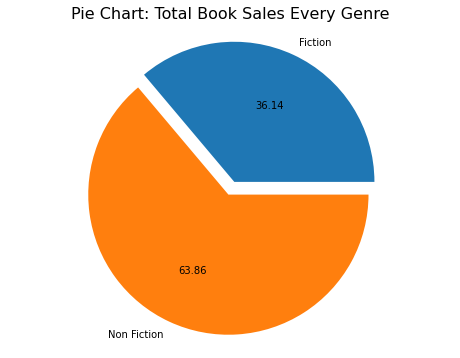

In [ ]:
plt.figure(figsize=(8,6))                  # mengatur ukuran diagram
plt.pie(sales_by_genre['Price'],           # data yang divisualsiasikan
        labels = sales_by_genre['Genre'],  # untuk menampilkan label di samping potongan diagram lingkaran
        autopct = '%.2f',                  # untuk menampilkan data di pie chart dalam bentuk persentase
        explode = (0.1, 0)                 # untuk mengatur jarak antar potongan, supaya terlihat terpisah
       )
plt.axis('equal')                          # untuk mengatur bentuk lingkaran supaya simetris
plt.title('Pie Chart: Total Book Sales Every Genre', size=16) # judul diagram
plt.show()

<hr>

#### **G. Correlation Heatmap**

Sebuah heatmap adalah teknik visualisasi data yang menunjukkan besarnya sebuah fenomena itu dari warna yang ditampilkan. Heatmap berisi nilai-nilai yang diwakili dengan warna-warna tertentu dalam plot. Heatmap korelasi menampilkan matriks korelasi 2 dimensi antara dua variable atau lebih.

Sebelum kita tampilkan dalam bentuk heatmap, kita perlu membuat correlation matrix terlebih dahulu. Matrix ini nanti akan menjadi data untuk divisualisasikan dalam bentuk heatmap. Correlation matrix adalah hasil uji korelasi beberapa variabel numerikal di dalam dataset.

**Correlation Matrix**

In [ ]:
correlation_matrix = df[['User Rating', 'Reviews', 'Price']].corr()
correlation_matrix

,User Rating,Reviews,Price
User Rating,1.000000,-0.001729,-0.133086
Reviews,-0.001729,1.000000,-0.109182
Price,-0.133086,-0.109182,1.000000


Berikut ini contoh ``Correlation Heatmap`` yang menampilkan ``Correlation matrix`` antara variabel Price, Reviews, dan User Rating. Warna hijau menunjukkan korelasi paling kuat (1). Saat variabel berkorelasi dengan dirinya sendiri. Korelasi paling lemah ditunjukkan dengan warna paling cerah. Sedangkan, yang relatif lebih kuat ditunjukkan warna merah mudah, yaitu korelasi antara User Rating dan Reviews.

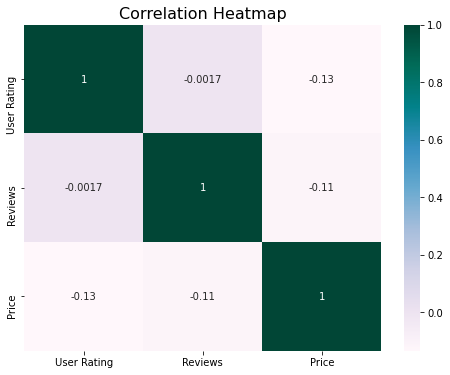

In [ ]:
plt.figure(figsize = (8,6))                                   # mengatur ukuran diagram
sns.heatmap(correlation_matrix, annot=True, cmap = 'PuBuGn')  # annot = True, untuk menampilkan nilai korelasi di heatmap, cmap = setting warna
plt.title('Correlation Heatmap', size = 16)                   # judul diagram
plt.show()

<hr>
